# Дрва на одлучување

Дрво на одлучување е граф со дрвенеста структура каде секој јазол е прашање кое го дели на неколку дела даденото множество податоци. Врските во дрвото се одговорите на прашањето поставено од јазолот. Листовите на дрвото се излезите кои ќе ги произведе дрвото за даден влезен податок. 

Дрвото на одлучување ги класифицира дадените влезни податоци така што ќе започне од коренот и одејќи од јазол на јазол ќе стигне до некој лист чија вредност е излез за дадениот влезен податок.

Еве пример за дрво на одлучување кое ќе ни одговори кое превозно средство да го искористиме во зависност од моменталната состојба на денот во кој се наоѓаме.

![Пример за дрво на одлучување](decision_tree_example.png)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Ова дрво го создаваме со помош на податоци со кои располагаме. Нека, на пример, пред нас ја имаме дадената табела од последните 12 дена. Од оваа табела може да биде создадено даденото дрво на одлучување.

In [30]:
df = pd.DataFrame(
    [['Sun', 44, True, 'Walk'], 
     ['Sun', 23, False, 'Bus'],
     ['Sun', 31, True, 'Walk'],
     ['Sun', 7, False, 'Bus'],
     ['Sun', 19, True, 'Bus'],
     ['Cloud', 34, True, 'Walk'],
     ['Cloud', 16, False, 'Bus'],
     ['Cloud', 6, True, 'Walk'],
     ['Cloud', 25, True, 'Walk'],
     ['Cloud', 71, False, 'Bus'],
     ['Rain', 12, False, 'Bus'],
     ['Rain', 34, True, 'Bus']], columns=['Wheather', 'Time', 'Hungry', 'Transport'])
df

,Wheather,Time,Hungry,Transport
0,Sun,44,True,Walk
1,Sun,23,False,Bus
2,Sun,31,True,Walk
3,Sun,7,False,Bus
4,Sun,19,True,Bus
5,Cloud,34,True,Walk
6,Cloud,16,False,Bus
7,Cloud,6,True,Walk
8,Cloud,25,True,Walk
9,Cloud,71,False,Bus


## Создавање дрво на одлучување

Основниот алгоритам за создавање дрво на одлучување е [ID3](https://en.wikipedia.org/wiki/ID3_algorithm). Алгоритамот го гради дрвото од коренот кон листовите и притоа користи алчен пристап. 
Накратко, алгоритамот оди вака:
*  Одреди која карактеристика е најдобро го дели множеството.
*  Означи ја таа карактеристика како јазол.
*  За секоја можна вредност на одбраната карактеристика ќе создадеме нов јазол кој ќе биде дете на моменталниот јазол.
*  Податоците кои ги имаме за моменталниот јазол ќе ги поделиме на сите негови деца според вредноста на одбраната карактеристика.
*  Ако новокреираните табели со дадените податоци се перфектно класифицирани, запираме, инаку истиот алгоритам го повторуваме за секој новокреиран јазол.

Главно прашање е како да одредиме која карактеристика е најдобра за да го подели множеството. За алгоритамот ID3 најдобра карактеристика е онаа која има најголема [информациска придобивка](https://en.wikipedia.org/wiki/Information_gain_in_decision_trees). Оваа придобивка ја сметаме како мерка која ќе измери колку добро карактеристиката го дели множеството на групи за да можеме успешно да класифицираме. 

Алгоритамот е алчен бидејќи секогаш ја одбира најдобрата поделба само за момнеталната распределба на податоците, а не ја гледа најдобрата можност генерално за целото дрво.

Алгоритамот подразбира дека сите карактеристики се дискретни, а класификацијата е бинарна. 

### Информациска придобивка

Информациската придобивка е статистичка мерка која кажува колку добро карактеристиката го дели множеството на групи за да можеме успешно да класифицираме. На сликата (десно) може да видиме како една карактеристика го дели множеството на два дела. Двата дела имаат приближно еднаков број `+` и `-`. Едноставно, оваа поделба не нѐ води поблиску кон успешна класификација бидејќи подгрупите се хомогени. За разлика од ова, (лево) ја имаме карактеристиката со голема информациска придобивка која подобро го дели множеството бидејќи има изразена нехомогеност. Лесно забележуваме дека во едната подгрупа имаме повеќе `+`, а во другата имаме повеќе `-`. Ова нѐ води кон успешна класификација.

![Висока информациска придобивка](high_information_gain.png) 
![Ниска информациска придобивка](low_information_gain.png) 

Пред да ја дефинираме точно информациската придобивка, ќе дефинираме што значи [ентропија](https://en.wikipedia.org/wiki/Entropy_(information_theory) во теоријата на инфромации. 

#### Ентропија

Генерално, ентропијата е мерка за неред во едно множество. За нашиот проблем ентропијата ќе ни каже дали во едно многжество податоци, како претходно со `+` и `-`, имаме хомогеност или пак не. Ентропијата $H$ во теоријата на информации ја пресметуваме според равенката на научникот [Клод Шенон](https://en.wikipedia.org/wiki/Claude_Shannon)

$$ H = \sum_i - p_i \log p_i$$

За алгоритамот ID3, неговата бинарна класификација, и дадено множество $S$ каде излезите се означени со `+` и `-`, ентропијата ќе ја запишуваме како

$$ H(S) = - p_+ \log_2 p_+ - p_- \log_2 p_- $$

каде $p_+$ е подмножеството на $S$ каде излезот е `+`, а $p_-$ е подмножеството на $S$ каде излезот е `-`.

Вредноста која ќе ја добиеме е реален број. На пример, за 30 податоци каде 14 се `+`, а 16 се `-`, ќе добиеме дека ентропијата е 0.996. 

In [4]:
a = 14  # plus
b = 16  # minus
m = a + b
a, b, m

(14, 16, 30)

In [5]:
def entropy(a, b):
    """
    Function that calculates information entropy.
    :param a: subset A size
    :param b: subset B size
    :returns: entropy
    """
    if a == 0 or b == 0:
        return 0
    m = a + b
    return - a/m * np.log2(a/m) - b/m * np.log2(b/m)

entropy(a, b)

0.9967916319816366

Во зависност од бројот на `+` и `-` можеме да исцртаме график. Графикот ќе го исцртаме за 100 точки.

Text(0.5, 1.0, 'Ентропија за дадено множество')

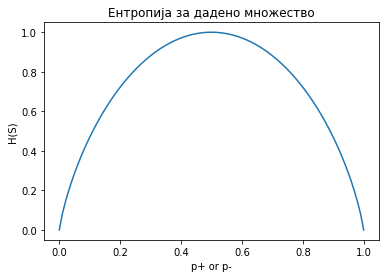

In [6]:
x = np.linspace(start=0, stop=1, num=100)
y = np.array([entropy(p, 1-p) for p in x])
plt.plot(x, y)
plt.xlabel('p+ or p-')
plt.ylabel('H(S)')
plt.title('Ентропија за дадено множество')

Од тука можеме да видиме дека ентропијата е 0 ако сите податоци од едно множество припаѓаат на една класа. Најголема е кога има ист број податоци од двете класи.

#### Духовита претстава на ентропијата според Стефан :D

Нека имаме $N$ гости. Ги прашуваме кој сака да пие пиво и ги класифицираме гостите во две групи: (1) пие пиво и (2) не пие пиво. Земаме одговор од секој од гостите и одиме во кујната. Таму ни се поставува прашањето "Кој рече дека ќе пие пиво?".
*  Најлесно е да запаметиме ако никој не пие пиво или пак сите ќе пијат.
*  Лесно е да запаметиме ако само еден нарачал пиво. Подеднакво лесно е да запаметиме ако само еден __не__ нерачал пиво.
*  Малку потешко е ако треба да запаметиме дека двајца ќе пијат пиво. Подеднакво тешко е ако треба да запаметиме дека двајца __нема__ да пијат пиво.
*  Уште малку потешко е ако треба да запаметиме дека тројца ќе пијат пиво. Подеднакво тешко е ако треба да запаметиме дека тројца __нема__ да пијат пиво.
*  ...
*  ...
*  ...
*  Најтешко е да запаметиме кои личности ќе пијат, а кои не, ако точно половина пијат, а другата половина не.

Всушност, она што треба да запаметиме е информацијата која ја носи анкетата направена врз гостите. Одговорите на гостите можеме да ги сметаме како стохастички извор на податоци. Ако секоја вечер ја правиме оваа анкета ќе добиеме распределба како на графикот горе. Ова е ентропијата.

Имајќи го предвид овој пример, многу полесно ќе ја разберете првата реченица на википедија која опишува што е [ентропија](https://en.wikipedia.org/wiki/Entropy_(information_theory)), цитирана подолу.

`Information entropy is the average rate at which information is produced by a stochastic source of data.`

Да се вратиме на алгоритамот ID3. Споменавме дека овој алгоритам за најдобра карактеристика ја одбира онаа која има најголема информациска придобивка. По трети пат, таа е мерка која ќе измери колку добро дадена карактеристика $a$ го дели множеството $S$ на групи за да можеме успешно да класифицираме. Генерално, ќе ја изразиме како разлика помеѓу моменталната ентропија на множеството $S$ и ентропијата која ќе ја пресметаме откако карактеристиката $a$ ќе го подели множеството на групи.

$$ IG(S, a) = H(S) - H(S|a) $$

Попрецизно ќе запишеме

$$ IG(S, a) = H(S) - \sum_v \frac{|S_a(v)|}{|S|} H(S_a(v)) $$

Тука $v$ е вредност на карактеристиката $a$ која го дели множеството на повеќе подмножества. Подмножеството на множеството $S$ за вредноста $v$ на карактеристиката $a$ го означуваме како $S_a(v)$. Ентропијата $H(S|a)$ откако $a$ ќе ги подели множеството ја пресметуваме како среднa вредност од ентропиите посебно пресметани за секоја вредност $v$ на карактеристиката $a$. Тие ентропии се помножени со тежински множител $\frac{|S_a(v)|}{|S|}$ кој кажува колкав дел се податоците во $S_a(v)$ од податоците во $S$.

Еве пример за дадено множество со 30 податоци од кои 14 се `+`, а 16 се `-`. Да ја пресметаме информациската придобивка.

![Информациска придобивка](information_gain.png)

Левото подмножество има 17 податоци, од кои 13 се `+`, а 4 се `-`. Тежинскиот множител ќе биде $\frac{17}{30}$. Ентропијата ќе ја пресметаме според функцијата `entropy()`со која веќе располагаме.

In [9]:
h1 = entropy(13, 4)
h1

0.7871265862012691

Десното подмножество има 13 податоци, од кои 1 е `+`, а 12 се `-`. Тежинскиот множител ќе биде $\frac{13}{30}$. Ентропијата ќе ја пресметаме според функцијата `entropy()`со која веќе располагаме.

In [10]:
h2 = entropy(1, 12)
h2

0.39124356362925566

Ентропијата на дадено множество веќе ја пресметавме погоре, но ќе ја пресметаму пак.

In [12]:
h_before_split = entropy(14, 16)
h_before_split

0.9967916319816366

Ентропијата $H(S|a)$ ќе ја пресметаме според дадената равенка.

In [15]:
h_after_split = 17/30 * h1 + 13/30 * h2
h_after_split

0.6155772764200632

За крај, ќе ја пресметаме информациската придобивка. Добиваме дека за оваа поделба на карактеристиката $a$ имаме информациска придобивка од 0.38.

In [16]:
information_gain = h_before_split - h_after_split
information_gain

0.38121435556157335

Ајде да пресметаме која карактеристика од `wheather`, `time` или пак `hungry` најдобро го дели множеството запишано во променливата `df` на почетокот на оваа дигитална тетратка.

In [19]:
df

,Wheather,Time,Hungry,Transport
0,Sun,44,True,Walk
1,Sun,23,False,Bus
2,Sun,31,True,Walk
3,Sun,7,False,Bus
4,Sun,19,True,Bus
5,Cloud,34,True,Walk
6,Cloud,16,False,Bus
7,Cloud,6,True,Walk
8,Cloud,25,True,Walk
9,Cloud,71,False,Bus


За успешна пресметка ќе ни требаат сите можни вредности за секоја карактеристика. Нив ќе ги добиеме 

In [26]:
list(df['Wheather'].unique())

['Sun', 'Cloud', 'Rain']

In [32]:
df['Time > 30'] = df['Time'] > 30
df

,Wheather,Time,Hungry,Transport,Time > 30
0,Sun,44,True,Walk,True
1,Sun,23,False,Bus,False
2,Sun,31,True,Walk,True
3,Sun,7,False,Bus,False
4,Sun,19,True,Bus,False
5,Cloud,34,True,Walk,True
6,Cloud,16,False,Bus,False
7,Cloud,6,True,Walk,False
8,Cloud,25,True,Walk,False
9,Cloud,71,False,Bus,True


In [44]:
df = df[['Wheather', 'Time', 'Time > 30', 'Hungry', 'Transport']]
df

,Wheather,Time,Time > 30,Hungry,Transport
0,Sun,44,True,True,Walk
1,Sun,23,False,False,Bus
2,Sun,31,True,True,Walk
3,Sun,7,False,False,Bus
4,Sun,19,False,True,Bus
5,Cloud,34,True,True,Walk
6,Cloud,16,False,False,Bus
7,Cloud,6,False,True,Walk
8,Cloud,25,False,True,Walk
9,Cloud,71,True,False,Bus


In [47]:
bus_data = df.query("Transport == 'Bus'")
bus_data

,Wheather,Time,Time > 30,Hungry,Transport
1,Sun,23,False,False,Bus
3,Sun,7,False,False,Bus
4,Sun,19,False,True,Bus
6,Cloud,16,False,False,Bus
9,Cloud,71,True,False,Bus
10,Rain,12,False,False,Bus
11,Rain,34,True,True,Bus


In [49]:
walk_data = df.query("Transport = = 'Walk'")
walk_data

,Wheather,Time,Time > 30,Hungry,Transport
0,Sun,44,True,True,Walk
2,Sun,31,True,True,Walk
5,Cloud,34,True,True,Walk
7,Cloud,6,False,True,Walk
8,Cloud,25,False,True,Walk


In [52]:
sun_data = df.query("Wheather == 'Sun'")
sun_data

,Wheather,Time,Time > 30,Hungry,Transport
0,Sun,44,True,True,Walk
1,Sun,23,False,False,Bus
2,Sun,31,True,True,Walk
3,Sun,7,False,False,Bus
4,Sun,19,False,True,Bus


In [53]:
sun_data_bus = sun_data.query("Transport == 'Bus'")
sun_data_bus

,Wheather,Time,Time > 30,Hungry,Transport
1,Sun,23,False,False,Bus
3,Sun,7,False,False,Bus
4,Sun,19,False,True,Bus


In [54]:
sun_data_walk = sun_data.query("Transport == 'Walk'")
sun_data_walk

,Wheather,Time,Time > 30,Hungry,Transport
0,Sun,44,True,True,Walk
2,Sun,31,True,True,Walk


In [55]:
h_before_split = entropy(bus_data.shape[0], walk_data.shape[0])
h_before_split

0.9798687566511528